In [1]:
import numpy as np

from customized.main.DatasetManager import DatasetManager
from customized.main.Evaluator import Evaluator
from customized.main.models.ClusteredUserBasedCF import ClusteredUserBasedCF

In [2]:
from customized.main.utils.plot_generators import measure_time, gen_plots_with_errbars
dirname = '/home/damian/Pulpit/Warsztat/CoML/recomm_project/data/'
dm = DatasetManager()

In [3]:
ml100k_filename = dirname + 'ml-100k/ua.base'
ml100k_filename_test = dirname + 'ml-100k/ua.test'

train = dm.load_csv(ml100k_filename, realative=False)
test = dm.load_csv(ml100k_filename_test, realative=False)

user_item = DatasetManager.transform_to_user_item_mat(train, verbose=True)
user_item_test = DatasetManager.transform_to_user_item_mat(test, verbose=True)

User number: 943, item number: 1682
User number: 943, item number: 1664


In [4]:
# eval models across different cluster number

models = [
    { 'model': ClusteredUserBasedCF, 'name': 'ClustUsrBasedCF'}
]

n_range = np.arange(1, 11)
repeat = 3

plots = [
    {'key': 'fit', 'name': 'Fitting time x n-clusters', 'xlabel': 'n', 'ylabel': 't [s]'},
    {'key': 'pred', 'name': 'Prediction time x n-clusters', 'xlabel': 'n', 'ylabel': 't [s]'},
    {'key': 'prec', 'name': 'Precision x n-clusters', 'xlabel': 'n', 'ylabel': 'prec'},
    {'key': 'rmse', 'name': 'RMSE x n-clusters', 'xlabel': 'n', 'ylabel': 'rmse'}
]

def func_clust(sink, model_desc, n):
    model_class = model_desc['model']
    model = model_class(n_clusters=n, verbose=True)
    
    measure_time(lambda: model.fit(user_item), sink['fit'])
    pred = measure_time(lambda: model.predict_all(), sink['pred'])
    
    recomm, _ = model._recommend_all(pred)
    recomm = model._transform_recomm(recomm)
    
    eval = Evaluator(user_item_test).eval(recomm, pred)
    
    sink['prec'].append(eval['prec'])
    sink['rmse'].append(eval['rmse'])
    
    
    

(0) started calculation for ClustUsrBasedCF case
[ClusteredUserBasedCF._clusterize] total 0.18 seconds have spent

[ClusteredUserBasedCF._calc_sim] total 6.23 seconds have spent

[ClusteredUserBasedCF.fit] total 6.42 seconds have spent

[ClusteredUserBasedCF.predict_all] total 27.42 seconds have spent

[ClusteredUserBasedCF._clusterize] total 0.17 seconds have spent

[ClusteredUserBasedCF._calc_sim] total 6.06 seconds have spent

[ClusteredUserBasedCF.fit] total 6.24 seconds have spent

[ClusteredUserBasedCF.predict_all] total 25.68 seconds have spent

[ClusteredUserBasedCF._clusterize] total 0.17 seconds have spent

[ClusteredUserBasedCF._calc_sim] total 6.23 seconds have spent

[ClusteredUserBasedCF.fit] total 6.40 seconds have spent

[ClusteredUserBasedCF.predict_all] total 25.87 seconds have spent

>>> results for value 1: 
  >>> fit - y: 6.350911060969035, err: 0.0823055726218203
  >>> pred - y: 26.32307704289754, err: 0.7807762215498069
  >>> prec - y: 0.22492046659597031, err: 0

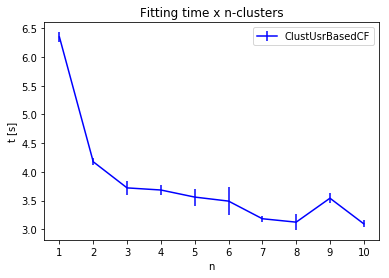

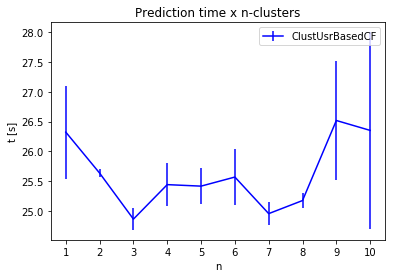

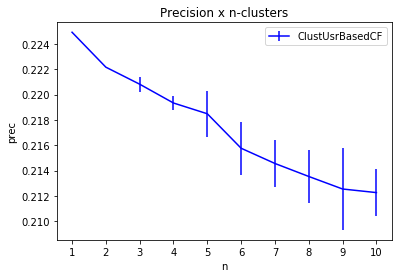

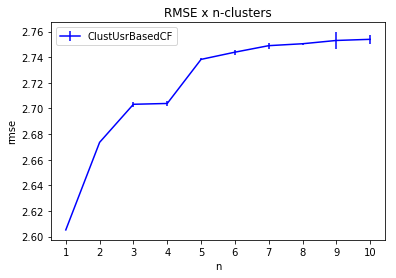

In [5]:
gen_plots_with_errbars(plots, models, n_range, func_clust, repeat, verbose=True)